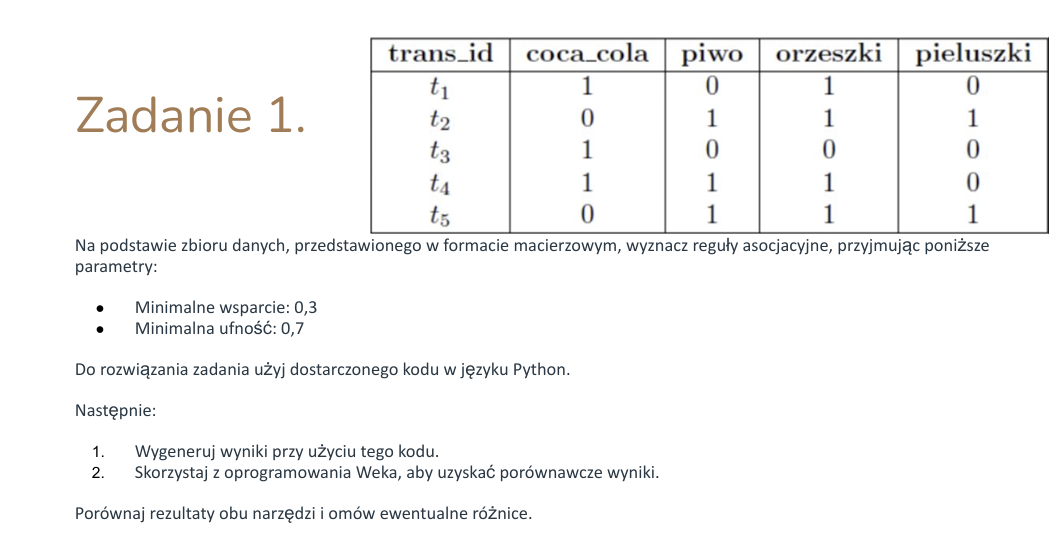
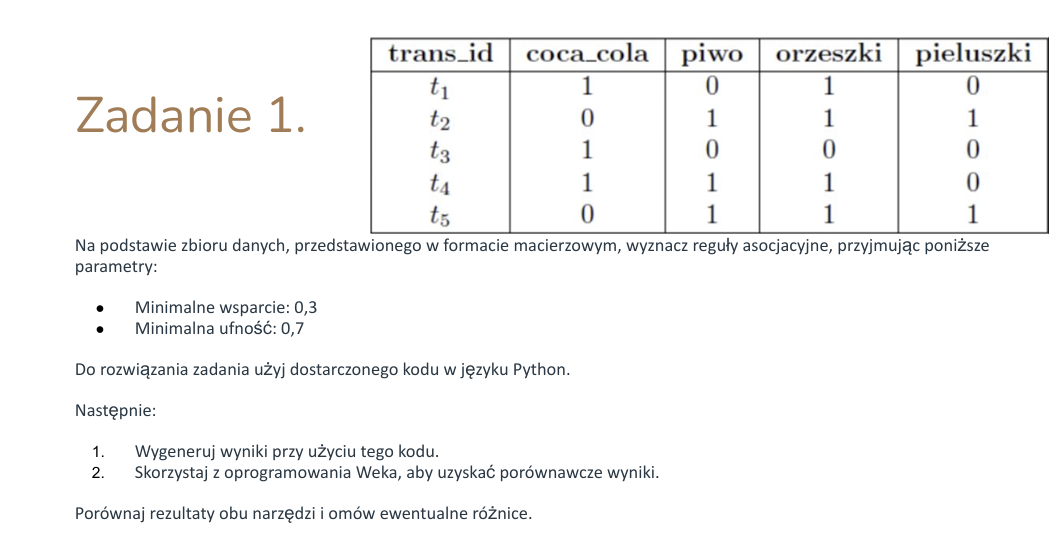
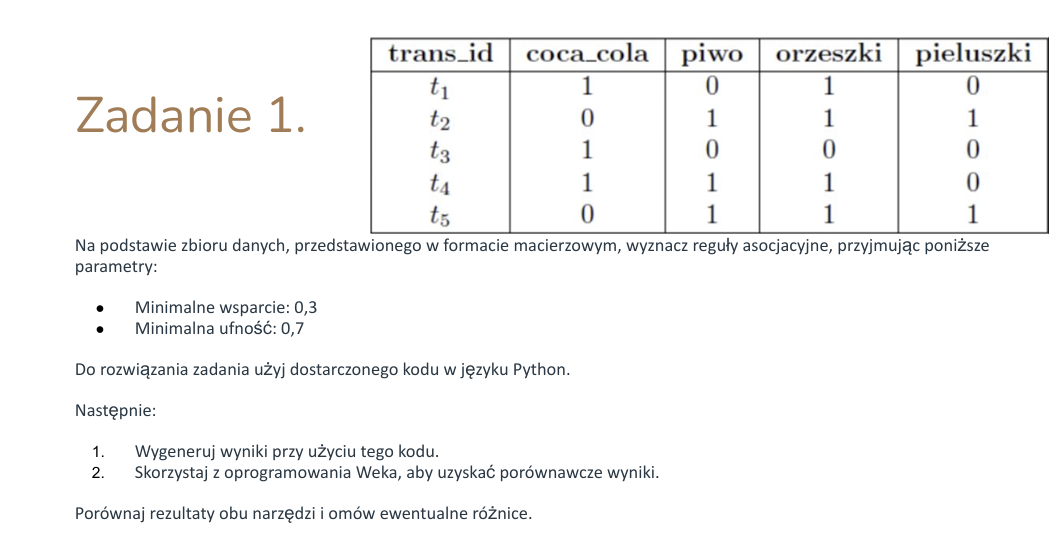

In [1]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

data = {
    'coca_cola': [1, 0, 1, 1, 0],
    'piwo': [0, 1, 0, 1, 1],
    'orzeszki': [1, 1, 0, 1, 1],
    'pieluszki': [0, 1, 0, 0, 1]
}

matrix = pd.DataFrame(data, index=['t1', 't2', 't3', 't4', 't5'])
matrixBool = matrix.astype(bool)


frequent_itemsets = apriori(matrixBool, min_support=0.3 , use_colnames=True)

rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)

display(rules)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(piwo),(orzeszki),0.6,0.8,0.6,1.00,1.250000,1.0,0.12,inf,0.500000,0.750000,1.000,0.875000
1,(orzeszki),(piwo),0.8,0.6,0.6,0.75,1.250000,1.0,0.12,1.6,1.000000,0.750000,0.375,0.875000
2,(pieluszki),(piwo),0.4,0.6,0.4,1.00,1.666667,1.0,0.16,inf,0.666667,0.666667,1.000,0.833333
3,(pieluszki),(orzeszki),0.4,0.8,0.4,1.00,1.250000,1.0,0.08,inf,0.333333,0.500000,1.000,0.750000
4,"(piwo, pieluszki)",(orzeszki),0.4,0.8,0.4,1.00,1.250000,1.0,0.08,inf,0.333333,0.500000,1.000,0.750000
5,"(pieluszki, orzeszki)",(piwo),0.4,0.6,0.4,1.00,1.666667,1.0,0.16,inf,0.666667,0.666667,1.000,0.833333
6,(pieluszki),"(piwo, orzeszki)",0.4,0.6,0.4,1.00,1.666667,1.0,0.16,inf,0.666667,0.666667,1.000,0.833333


Zapis do pliu ARFF

In [3]:
import arff  # To jest moduł z biblioteki liac-arff
df = matrix
# Tworzenie listy atrybutów automatycznie na podstawie danych w DataFrame
attributes = []
for column in df.columns:
    unique_values = df[column].unique()
    if df[column].dtype == object:
        # Dodanie atrybutu z listą unikalnych wartości dla kolumny typu object (kategoria)
        attributes.append((column, unique_values.tolist()))
    else:
        # Dodanie atrybutu z wartościami '1' i '0' dla kolumn numerycznych (0/1)
        attributes.append((column, ['1', '0']))

# Struktura ARFF
arff_data = {
    'relation': 'dynamic_data',
    'attributes': attributes,
    'data': df.values.tolist()
}

# Zapis do pliku ARFF
with open('zad1_data.arff', 'w') as f:
    arff.dump(arff_data, f)


# **OUTUPT z WEKA**

=== Run information ===

Scheme:       weka.associations.Apriori -N 50 -T 0 -C 0.7 -D 0.05 -U 1.0 -M 0.3 -S -1.0 -c -1
Relation:     dynamic_data
Instances:    5
Attributes:   4
              coca_cola
              piwo
              orzeszki
              pieluszki
=== Associator model (full training set) ===


Apriori
=======

Minimum support: 0.3 (2 instances)
Minimum metric <confidence>: 0.7
Number of cycles performed: 14

Generated sets of large itemsets:

Size of set of large itemsets L(1): 7

Size of set of large itemsets L(2): 11

Size of set of large itemsets L(3): 6

Size of set of large itemsets L(4): 1

Best rules found:

 1. pieluszki=0 3 ==> coca_cola=1 3    <conf:(1)> lift:(1.67) lev:(0.24) [1] conv:(1.2)
 2. coca_cola=1 3 ==> pieluszki=0 3    <conf:(1)> lift:(1.67) lev:(0.24) [1] conv:(1.2)
 3. piwo=1 3 ==> orzeszki=1 3    <conf:(1)> lift:(1.25) lev:(0.12) [0] conv:(0.6)
 4. piwo=0 2 ==> coca_cola=1 2    <conf:(1)> lift:(1.67) lev:(0.16) [0] conv:(0.8)
 5. coca_cola=0 2 ==> piwo=1 2    <conf:(1)> lift:(1.67) lev:(0.16) [0] conv:(0.8)
 6. coca_cola=0 2 ==> orzeszki=1 2    <conf:(1)> lift:(1.25) lev:(0.08) [0] conv:(0.4)
 7. pieluszki=1 2 ==> coca_cola=0 2    <conf:(1)> lift:(2.5) lev:(0.24) [1] conv:(1.2)
 8. coca_cola=0 2 ==> pieluszki=1 2    <conf:(1)> lift:(2.5) lev:(0.24) [1] conv:(1.2)
 9. pieluszki=1 2 ==> piwo=1 2    <conf:(1)> lift:(1.67) lev:(0.16) [0] conv:(0.8)
10. piwo=0 2 ==> pieluszki=0 2    <conf:(1)> lift:(1.67) lev:(0.16) [0] conv:(0.8)
11. pieluszki=1 2 ==> orzeszki=1 2    <conf:(1)> lift:(1.25) lev:(0.08) [0] conv:(0.4)
12. piwo=0 pieluszki=0 2 ==> coca_cola=1 2    <conf:(1)> lift:(1.67) lev:(0.16) [0] conv:(0.8)
13. coca_cola=1 piwo=0 2 ==> pieluszki=0 2    <conf:(1)> lift:(1.67) lev:(0.16) [0] conv:(0.8)
14. piwo=0 2 ==> coca_cola=1 pieluszki=0 2    <conf:(1)> lift:(1.67) lev:(0.16) [0] conv:(0.8)
15. orzeszki=1 pieluszki=0 2 ==> coca_cola=1 2    <conf:(1)> lift:(1.67) lev:(0.16) [0] conv:(0.8)
16. coca_cola=1 orzeszki=1 2 ==> pieluszki=0 2    <conf:(1)> lift:(1.67) lev:(0.16) [0] conv:(0.8)
17. coca_cola=0 orzeszki=1 2 ==> piwo=1 2    <conf:(1)> lift:(1.67) lev:(0.16) [0] conv:(0.8)
18. coca_cola=0 piwo=1 2 ==> orzeszki=1 2    <conf:(1)> lift:(1.25) lev:(0.08) [0] conv:(0.4)
19. coca_cola=0 2 ==> piwo=1 orzeszki=1 2    <conf:(1)> lift:(1.67) lev:(0.16) [0] conv:(0.8)
20. piwo=1 pieluszki=1 2 ==> coca_cola=0 2    <conf:(1)> lift:(2.5) lev:(0.24) [1] conv:(1.2)
21. coca_cola=0 pieluszki=1 2 ==> piwo=1 2    <conf:(1)> lift:(1.67) lev:(0.16) [0] conv:(0.8)
22. coca_cola=0 piwo=1 2 ==> pieluszki=1 2    <conf:(1)> lift:(2.5) lev:(0.24) [1] conv:(1.2)
23. pieluszki=1 2 ==> coca_cola=0 piwo=1 2    <conf:(1)> lift:(2.5) lev:(0.24) [1] conv:(1.2)
24. coca_cola=0 2 ==> piwo=1 pieluszki=1 2    <conf:(1)> lift:(2.5) lev:(0.24) [1] conv:(1.2)
25. orzeszki=1 pieluszki=1 2 ==> coca_cola=0 2    <conf:(1)> lift:(2.5) lev:(0.24) [1] conv:(1.2)
26. coca_cola=0 pieluszki=1 2 ==> orzeszki=1 2    <conf:(1)> lift:(1.25) lev:(0.08) [0] conv:(0.4)
27. coca_cola=0 orzeszki=1 2 ==> pieluszki=1 2    <conf:(1)> lift:(2.5) lev:(0.24) [1] conv:(1.2)
28. pieluszki=1 2 ==> coca_cola=0 orzeszki=1 2    <conf:(1)> lift:(2.5) lev:(0.24) [1] conv:(1.2)
29. coca_cola=0 2 ==> orzeszki=1 pieluszki=1 2    <conf:(1)> lift:(2.5) lev:(0.24) [1] conv:(1.2)
30. orzeszki=1 pieluszki=1 2 ==> piwo=1 2    <conf:(1)> lift:(1.67) lev:(0.16) [0] conv:(0.8)
31. piwo=1 pieluszki=1 2 ==> orzeszki=1 2    <conf:(1)> lift:(1.25) lev:(0.08) [0] conv:(0.4)
32. pieluszki=1 2 ==> piwo=1 orzeszki=1 2    <conf:(1)> lift:(1.67) lev:(0.16) [0] conv:(0.8)
33. piwo=1 orzeszki=1 pieluszki=1 2 ==> coca_cola=0 2    <conf:(1)> lift:(2.5) lev:(0.24) [1] conv:(1.2)
34. coca_cola=0 orzeszki=1 pieluszki=1 2 ==> piwo=1 2    <conf:(1)> lift:(1.67) lev:(0.16) [0] conv:(0.8)
35. coca_cola=0 piwo=1 pieluszki=1 2 ==> orzeszki=1 2    <conf:(1)> lift:(1.25) lev:(0.08) [0] conv:(0.4)
36. coca_cola=0 piwo=1 orzeszki=1 2 ==> pieluszki=1 2    <conf:(1)> lift:(2.5) lev:(0.24) [1] conv:(1.2)
37. orzeszki=1 pieluszki=1 2 ==> coca_cola=0 piwo=1 2    <conf:(1)> lift:(2.5) lev:(0.24) [1] conv:(1.2)
38. piwo=1 pieluszki=1 2 ==> coca_cola=0 orzeszki=1 2    <conf:(1)> lift:(2.5) lev:(0.24) [1] conv:(1.2)
39. coca_cola=0 pieluszki=1 2 ==> piwo=1 orzeszki=1 2    <conf:(1)> lift:(1.67) lev:(0.16) [0] conv:(0.8)
40. coca_cola=0 orzeszki=1 2 ==> piwo=1 pieluszki=1 2    <conf:(1)> lift:(2.5) lev:(0.24) [1] conv:(1.2)
41. coca_cola=0 piwo=1 2 ==> orzeszki=1 pieluszki=1 2    <conf:(1)> lift:(2.5) lev:(0.24) [1] conv:(1.2)
42. pieluszki=1 2 ==> coca_cola=0 piwo=1 orzeszki=1 2    <conf:(1)> lift:(2.5) lev:(0.24) [1] conv:(1.2)
43. coca_cola=0 2 ==> piwo=1 orzeszki=1 pieluszki=1 2    <conf:(1)> lift:(2.5) lev:(0.24) [1] conv:(1.2)
44. orzeszki=1 4 ==> piwo=1 3    <conf:(0.75)> lift:(1.25) lev:(0.12) [0] conv:(0.8)



# Wnioski:

* #### Python pokazuje 7 → tylko pozytywne

* #### Weka 44 → wszystkie reguły z negacjami

##### Po odfiltrowaniu pozostaje 7:

 3. piwo=1 3 ==> orzeszki=1 3    <conf:(1)> lift:(1.25) lev:(0.12) [0] conv:(0.6)
 9. pieluszki=1 2 ==> piwo=1 2    <conf:(1)> lift:(1.67) lev:(0.16) [0] conv:(0.8)
11. pieluszki=1 2 ==> orzeszki=1 2    <conf:(1)> lift:(1.25) lev:(0.08) [0] conv:(0.4)
30. orzeszki=1 pieluszki=1 2 ==> piwo=1 2    <conf:(1)> lift:(1.67) lev:(0.16) [0] conv:(0.8)
31. piwo=1 pieluszki=1 2 ==> orzeszki=1 2    <conf:(1)> lift:(1.25) lev:(0.08) [0] conv:(0.4)
32. pieluszki=1 2 ==> piwo=1 orzeszki=1 2    <conf:(1)> lift:(1.67) lev:(0.16) [0] conv:(0.8)
44. orzeszki=1 4 ==> piwo=1 3    <conf:(0.75)> lift:(1.25) lev:(0.12) [0] conv:(0.8)

#### Są to dokładnie te same reguły, które wygenerował Python mlxtend. Wartości identyczne w obu narzędziach: Confidence, Lift, Leverage

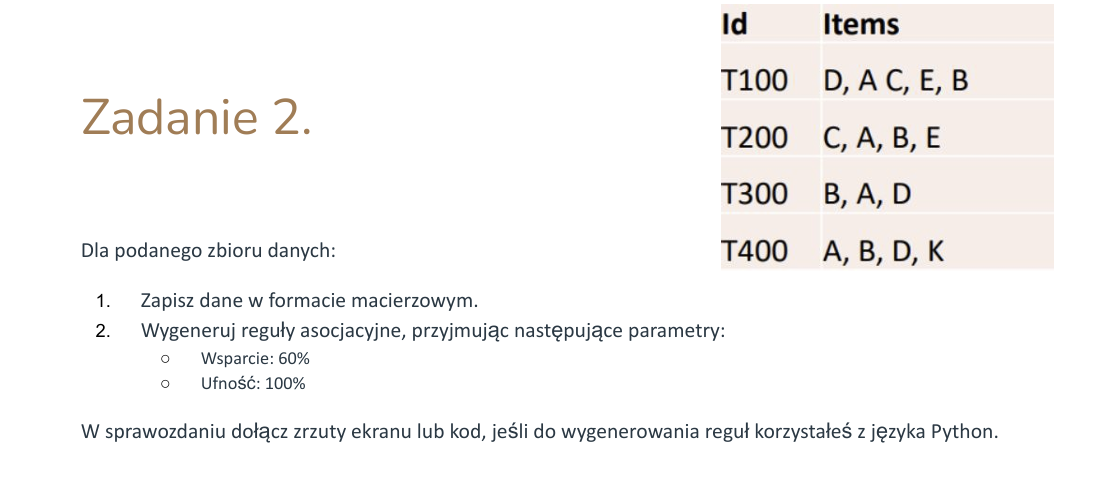

In [7]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

data = {
    'A': [1, 1, 1, 1],     # T100, T200, T300, T400
    'B': [1, 1, 1, 1],
    'C': [1, 1, 0, 0],
    'D': [1, 0, 1, 1],
    'E': [1, 1, 0, 0],
    'K': [0, 0, 0, 1]
}

matrix = pd.DataFrame(data, index=['T100', 'T200', 'T300', 'T400'])

frequent_itemsets = apriori(matrix, min_support=0.6, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=1.0)

display(rules)

C:\Users\megaz\PycharmProjects\JupyterProject\.venv\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
C:\Users\megaz\PycharmProjects\JupyterProject\.venv\Lib\site-packages\mlxtend\frequent_patterns\association_rules.py:186: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(B),(A),1.00,1.0,1.00,1.0,1.0,1.0,0.0,inf,0.0,1.00,0.0,1.000
1,(A),(B),1.00,1.0,1.00,1.0,1.0,1.0,0.0,inf,0.0,1.00,0.0,1.000
2,(D),(A),0.75,1.0,0.75,1.0,1.0,1.0,0.0,inf,0.0,0.75,0.0,0.875
3,(D),(B),0.75,1.0,0.75,1.0,1.0,1.0,0.0,inf,0.0,0.75,0.0,0.875
4,"(B, D)",(A),0.75,1.0,0.75,1.0,1.0,1.0,0.0,inf,0.0,0.75,0.0,0.875
5,"(D, A)",(B),0.75,1.0,0.75,1.0,1.0,1.0,0.0,inf,0.0,0.75,0.0,0.875
6,(D),"(B, A)",0.75,1.0,0.75,1.0,1.0,1.0,0.0,inf,0.0,0.75,0.0,0.875
